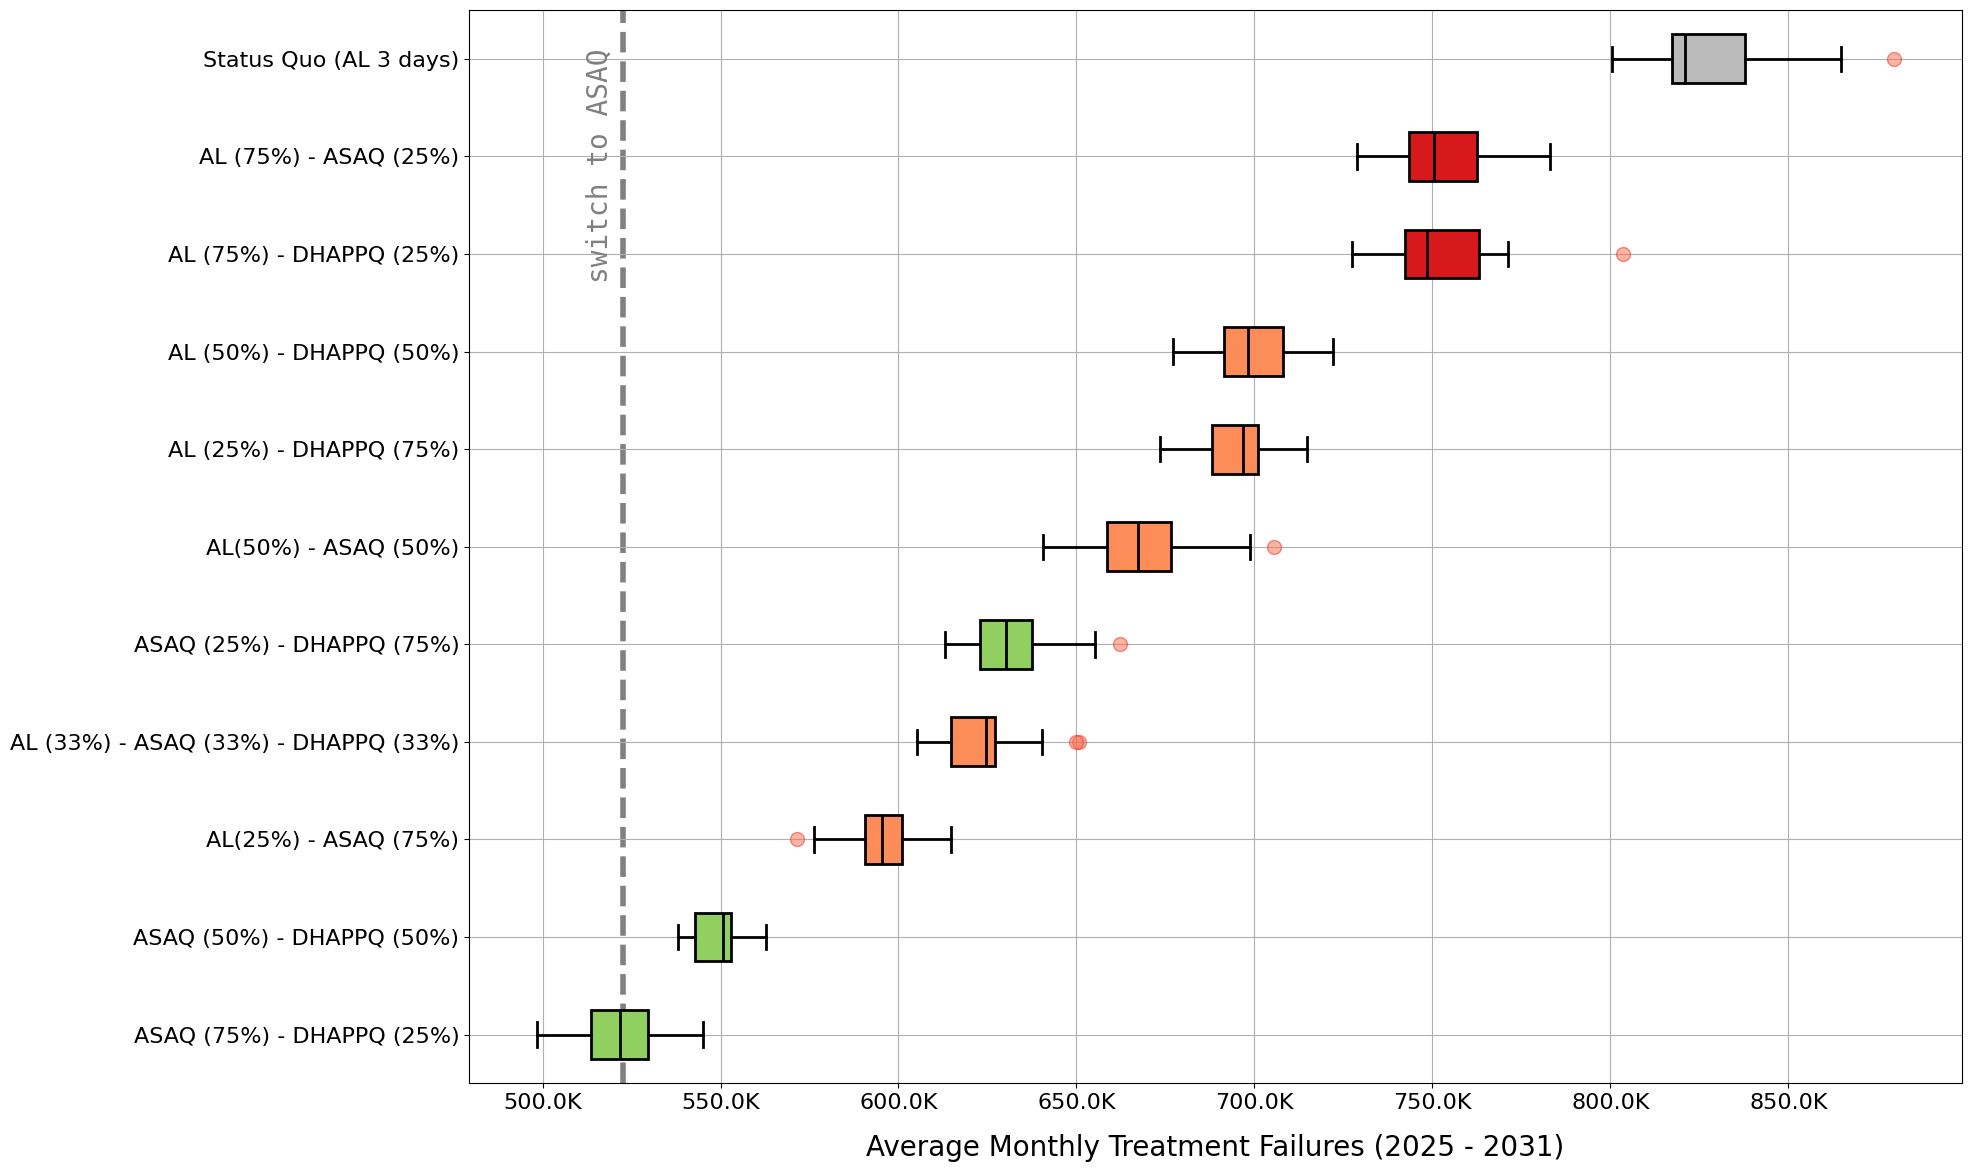

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter


# Custom formatter function for x-axis
def millions_formatter(x, pos):
    return f'{int(x) / 1e6}M'

# Custom formatter function for x-axis
def thousands_formatter(x, pos):
    return f'{int(x) / 1e3}K'

#setting
scenario_mapping = {
    "status_quo": {"label": "Status Quo (AL 3 days)", "color": "#bababa", "position": 0},
    "mft_al75_asaq25": {"label": "AL (75%) - ASAQ (25%)", "color": "#d7191c", "position": 0},
    "mft_al75_dhappq25": {"label": "AL (75%) - DHAPPQ (25%)", "color": "#d7191c", "position": 0},
    "mft_al50_dhappq50": {"label": "AL (50%) - DHAPPQ (50%)", "color": "#fc8d59", "position": 0},
    "mft_al25_dhappq75": {"label": "AL (25%) - DHAPPQ (75%)", "color": "#fc8d59", "position": 0},
    "mft_al50_asaq50": {"label": "AL(50%) - ASAQ (50%)", "color": "#fc8d59", "position": 0},
    "mft_asaq25_dhappq75": {"label": "ASAQ (25%) - DHAPPQ (75%)", "color": "#91cf60", "position": 0},
    "mft_al_asaq_dhappq": {"label": "AL (33%) - ASAQ (33%) - DHAPPQ (33%)", "color": "#fc8d59", "position": 0},
    "mft_al25_asaq75": {"label": "AL(25%) - ASAQ (75%)", "color": "#fc8d59", "position": 0},
    "mft_asaq50_dhappq50": {"label": "ASAQ (50%) - DHAPPQ (50%)", "color": "#91cf60", "position": 0},
    "mft_asaq75_dhappq25": {"label": "ASAQ (75%) - DHAPPQ (25%)", "color": "#91cf60", "position": 0},
    # "mft_al5_asaq_dhappq": {"label": "AL 5 days (33%) - ASAQ (33%) - DHAPPQ (33%)", "color": "#91cf60", "position": 0},
}
for i, key in enumerate(scenario_mapping):
    scenario_mapping[key]['position'] = -i
group_endings = ["mac_dhppq_al_789"] 


# Load the dataset
data_path = './data/ntfs_6y.csv'
data_labeled = pd.read_csv(data_path)
data_labeled = data_labeled [ (data_labeled["scenario"].isin(scenario_mapping.keys())) & (data_labeled["year"] == 2031)]
data_labeled["total_treatmentfailures"] = data_labeled["total_treatmentfailures"] / (12*6)

# sorted_scenario = data_labeled.groupby(["scenario", "year"]).agg({"total_treatmentfailures": "median"}).sort_values(by="total_treatmentfailures", ascending=True).reset_index()["scenario"]
# # Apply corrected positions to the sorted scenario
# for index, key in enumerate(sorted_scenario):
#     if key in scenario_mapping:
#         scenario_mapping[key]['position'] = index


data_labeled['position'] = data_labeled['scenario'].apply(lambda x: scenario_mapping[x]['position'])

# Introduce variables for box width and spacing
box_width = 0.2  # Can be adjusted for narrower or wider boxes
spacing_multiplier = 0.4  # Adjust this to make boxplots closer or further apart
dynamic_positions = {scenario: details["position"] * spacing_multiplier for scenario, details in scenario_mapping.items()}

# Calculate dynamic positions for dashed lines
adjusted_group_separators = [dynamic_positions[scenario] - 0.5 * spacing_multiplier for scenario in group_endings[:-1]]  # Adjust, exclude last

plt.rcdefaults()
plt.rcParams['font.size'] = 16
lw=2
outlier_size=10
# Create the plots with corrected positions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), sharey=False, sharex=False)
# box_plot_for_a_year(axes, data_labeled, 2029, dynamic_positions, adjusted_group_separators, is_first_column=True)
for scenario, details in scenario_mapping.items():
    scenario_data = data_labeled[(data_labeled['scenario'] == scenario) & (data_labeled['year'] == 2031)]['total_treatmentfailures']
    if not scenario_data.empty:
        ax.boxplot(scenario_data, positions=[dynamic_positions[scenario]], 
                    widths=box_width, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=details['color'], color='black',  linewidth=lw),
                    whiskerprops=dict(color='black',linewidth=lw),
                    capprops=dict(color='black', linewidth=lw),
                    medianprops=dict(color='black', linewidth=lw),
                    flierprops=dict(marker='o', markerfacecolor='#fb6a4a',markeredgecolor='#de2d26', alpha=0.5,markersize=outlier_size)
                    )

ax.axvline(
    x=522456,  # Line position
    c="grey",  # Line color
    linewidth=4,  # Line thickness
    linestyle = '--',
    zorder=0,  # Ensure it renders behind the bars
    clip_on=True,  # Allow line to extend beyond axes
)

ax.text(
    520000,  # Position on the x-axis
    -0.44,  # Position on the y-axis
    "switch to ASAQ",
    fontweight="normal",
    fontname='monospace',
    fontsize = 20,
    color="grey",
    rotation=90,
    va="center",
    ha="right",
)

# ax.set_xlim(300000, 580000)
min_y = min(dynamic_positions.values()) - 0.5 * spacing_multiplier
max_y = max(dynamic_positions.values()) + 0.5 * spacing_multiplier
ax.set_ylim(min_y, max_y)

ax.set_yticklabels([details["label"] for scenario, details in scenario_mapping.items()])
ax.set_xlabel('Average Monthly Treatment Failures (2025 - 2031)', fontsize=20, labelpad=15)
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Apply the custom formatter
ax.grid(axis='both')

plt.tight_layout()
plt.savefig("figure_5.png", dpi=300)

